<a href="https://colab.research.google.com/github/juhi2021/juhi2021.github.io/blob/main/docs/Wine_Quality_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Quality Prediction Case Study**

## **Define problem statement**

**Problem Statement :** To create a model which can predict the quality of wine based on the given chemical properties of the wine.

**Output Target :** quality (1 means worst and 10 means best, dataset contains 3-8 range of quality)

**Input predictors :** fixed acidity, free sulphur dioxide, sulphates, chlorides, alcohol, citric acid, residual sugar, total sulfur dioxide, density, pH

**Solution :** To create a supervised ML classification model, as the target variable is categorical.

## **Load Data**

**Import libraries**

In [ ]:
#import pandas for loading the CSV file
import pandas as pd

#import numpy for maths
import numpy as np

# import seaborn for visualization
import seaborn as sns

from sklearn import preprocessing
from collections import Counter

# import module for table creation
from tabulate import tabulate

#import matplotlib for graphs
import matplotlib.pyplot as plt

#To visualise in the notebook
%matplotlib inline

#filter the warning messages
import warnings
warnings.filterwarnings('ignore')

#library for Standardization of a dataset (e.g. Gaussian with 0 mean and unit variance)
from sklearn.preprocessing import StandardScaler

#library for splitting dataset into test and train
from sklearn.model_selection import train_test_split

#library for the models used in this case study
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

#metric used for the models of this case study
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from sklearn.model_selection import KFold

#Feature selection library
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

#library for imbalanced resampling (over sampling)
from imblearn.over_sampling import SMOTE

sns.set_style('darkgrid')

# Mount google drive in google colab
#from google.colab import drive
#drive.mount('/content/drive')

#to import the custom module after mounting the drive
import sys
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks')

#custom library for data exploration
from lib import explore_data as ed
from lib.Model import Model

Hello you are in explore_data file


**Read CSV dataset into dataframe**

In [ ]:
train_path = '/content/drive/MyDrive/Data/Wine/winequality-red.csv'
train_df = pd.read_csv(train_path)

**Check for duplicate rows and drop the duplicates**

In [ ]:
print("Number of duplicate rows {}".format(train_df[train_df.duplicated()].shape))
#drop the duplicates
train_df.drop_duplicates(inplace=True)
print("Number of records after duplicate removal {}".format(train_df.shape))

Number of duplicate rows (240, 12)
Number of records after duplicate removal (1359, 12)


**Define target**

In [ ]:
target_var = 'quality'
y = pd.DataFrame(train_df[target_var])

## **Exploratory Data Analysis (EDA)**

### **Basic Data Exploration**



---

**Observe data**

---





**Number of rows and columns**

In [ ]:
train_df.shape

(1359, 12)

**Insight :** The dataset has 1599 rows × 12 features including the target.


**Data Types for the features**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


**Insight :** Out of 12 features 11 are float and 1 is of int data type. Clearly, from the above table none of the feature have missing values or NAN as the non-null values equals the total number of records.

**Display sample data**

*   Display the first 5 rows of the dataset along with the target
*   Display the last 5 rows of the dataset along with the target 

In [ ]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
train_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6




---



**Analyze Target**






---




**Check descriptive statistics for the numeric data**

In [ ]:
train_df.describe().append([train_df.mode().rename({0:'Mode'}, axis='index'), 
               train_df.skew().to_frame().swapaxes(1, 0).rename({0:'Skew'}, axis='index'),
               train_df.kurt().to_frame().swapaxes(1, 0).rename({0:'Kurt'}, axis='index'),
               (train_df.quantile(0.75) - train_df.quantile(0.25)).to_frame().swapaxes(1, 0).rename({0:'IQR'}, axis='index')]).round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00,1359.00
mean,8.31,0.53,0.27,2.52,0.09,15.89,46.83,1.00,3.31,0.66,10.43,5.62
std,1.74,0.18,0.20,1.35,0.05,10.45,33.41,0.00,0.16,0.17,1.08,0.82
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.43,2.60,0.09,21.00,63.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00
Mode,7.20,0.50,0.00,2.00,0.08,6.00,28.00,1.00,3.30,0.54,9.50,5.00
Skew,0.94,0.73,0.31,4.55,5.50,1.23,1.54,0.04,0.23,2.41,0.86,0.19


**Insight :** Analyze the data, for example, the feature 'fixed acidity' has 
*   total 1359 records
*   mean of 8.31
*   standard deviation as 1.74
*   4.6 as its minimum value
*   15.9 as its maximum value
*   range is 15.9-4.6=11.3
*   25% of the values of the feature are < or = 7.1
*   50% of the values of the feature are < or = 7.9 i.e. the median value
*   75% of the values of the feature are < or = 9.2
*   and only 25% of the values of the feature are > 9.2 but less than 15.9
*   mean > median indicating the distribution is positively skewed (the distribution peak is towards left and the tail on the right side of the distribution is longer or fatter)
*   Range (11.3) is much larger compared to the IQR (2.1).
*   The above two observations indicate that there are outliers in the data.
*   Mode is 7.2 (most frequent value)
*   Skewness = 0.94 shows that the feature is moderately positively skewed
*   Kurtosis = 1.05 shows that the feature's distribution is shorter and the tails are thinner than the normal distribution
*   Notice the high values of Kurtosis for features Residual Sugar and Chlorides suggesting heavy tails and thereby many outliers.
*   Notice the high values of Skewness for features Residual Sugar and Chlorides suggesting a right-skewed distribution and indicating the presence of extreme higher values.
*   Notice high variance of feature 'Total Sulphur dioxide'

Similarly, analyze other features.

**Find the unique classes for the target variable**

In [ ]:
sorted(train_df['quality'].unique())

[3, 4, 5, 6, 7, 8]

**Insight :** The target value i.e. the quality feature for wine is within range 3-8, indicating that wine with value 3 has lowest quality and wine with 8 has the highest quality. Therefore, quality is an ordinal variable with a possible ranking from 1(worst quality wine) to 10(best quality wine).

**Summarize target class distribution**

In [ ]:
print(Counter(y.quality))

Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})


The above data shows that there are too few examples of the minority class for a model to effectively learn the decision boundary. Hence the dataset is imbalanced. One approach to addressing imbalanced datasets is to oversample the minority class. We will use Synthetic Minority Oversampling Technique, or SMOTE for over sampling.



---

**Analyze input predictors**

---



**List of numerical and categorical features**

In [ ]:
# list of numerical variables
num_feat_list = train_df.select_dtypes(include=np.number).columns.tolist()
print('numerical features: ', num_feat_list)

# list of categorical variables
cat_feat_list = list(train_df.select_dtypes(exclude=np.number).columns)
print('categorical features: {}'.format(cat_feat_list))

numerical features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
categorical features: []


**Check for mismatched numeric variables and categorical variables**

In [ ]:
#Check for unique values of each feature, if the values are <20 then the variable is likely to be categorical
cat_feats_as_num = train_df.columns[train_df.nunique()<20].to_list()
print('Categorical Features with wrong datatypes {}'.format(cat_feats_as_num))

Categorical Features with wrong datatypes ['quality']


**Change the datatypes of the mismatched variables**

In [ ]:
# change data type of num columns to cat type
for i in cat_feats_as_num:
  train_df[i] = train_df[i].astype('category')

**Recalculate the list of numeric and categorical features**

In [ ]:
# list of numerical variables
num_feat_list = train_df.select_dtypes(include=np.number).columns.tolist()
print('numerical features: ', num_feat_list)

# list of categorical variables
cat_feat_list = list(train_df.select_dtypes(exclude=np.number).columns)
print(f'categorical features: {cat_feat_list}')

numerical features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
categorical features: ['quality']




---

**Outliers Detection**

---



**Function to detect outliers using Tukey's method**

In [ ]:
def detect_outliers(df, features, no_of_outlier_in_row, threshold=1.5):
  """
  Input - dataframe of features 
  output - feature wise list of the indices and count
  Procedure - Tukey method.
  """
  outliers = []
  
  # iterate over features(columns)
  for col in features:
    # 1st quartile (25%)
    Q1 = df[col].quantile(0.25)

    # 3rd quartile (75%)
    Q3 = df[col].quantile(0.75)

    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # outlier step
    outlier_step = threshold * IQR

    #calculate lower limit
    lower_limit = Q1 - outlier_step

    #calculate upper limit
    upper_limit = Q3 + outlier_step
    
    # Determine a list of indices of outliers for feature col
    outlier_list_col = df[(df[col] < lower_limit) | 
                          (df[col] > upper_limit )].index
    
    if (len(outlier_list_col) > 0):
      outliers.append({'Feature': col, 'No_of_outliers':len(outlier_list_col), 'Outlier_rows':outlier_list_col})
     
  #print('Num of outlier detected:', outliers)

  return outliers

**Detect the number of outliers in the dataset**

In [ ]:
# detect outliers from all columns, this return the dictionary of indices and column number
outliers = detect_outliers(train_df, num_feat_list, 0)

print(tabulate(outliers))

out_val = 0
for ind, val in enumerate(outliers):
  out_val += val.get('No_of_outliers')
print("Total                 {}".format(out_val))

--------------------  ---  ----------------------------------------------------------------------------------------------
fixed acidity          41  Int64Index([ 205,  243,  264,  294,  328,  338,  339,  347,  353,  359,  363,
                                        364,  374,  381,  394,  409,  429,  440,  442,  446,  470,  472,
                                        509,  510,  516,  538,  544,  548,  554,  557,  559,  560,  596,
                                        599,  601,  611,  652,  680,  811,  814, 1224],
                                      dtype='int64')
volatile acidity       19  Int64Index([  38,   94,  120,  126,  127,  134,  199,  553,  672,  690,  700,
                                        705,  710,  724,  899, 1261, 1299, 1312, 1467],
                                      dtype='int64')
citric acid             1  Int64Index([151], dtype='int64')
residual sugar        126  Int64Index([   9,   14,   15,   18,   33,   35,   39,   55,   57,   64,
                 

**Insight:**
*   Features 'Residual Sugar' and 'Chlorides' have highest number of outliers
*   This was suggested by values of Skewness and Kurtosis earlier



### **Univariate Analysis**

**Function to plot Histogram, Boxplot and Scatter plot for individual features**

In [ ]:
#Plot Numerical Data - three plots per feature
def plot_uni_num(data, rows, feature):
  '''
  Input - Dataframe, number of rows, feature name
  Output - Histogram, Boxplot and Scatter plot for individual features
  Process - Plot Histogram, Boxplot and Scatter plot using seaborn
  '''
  #  plot Numerical Data
  fig_rows = rows  # number of rows
  fig_cols = 3  # number of columns
  fig_counter = 1  # initialize plot counter

  fig = plt.figure(figsize=(10, 2*fig_rows))
  
  plt.subplot(fig_rows, fig_cols, fig_counter)
  ax = sns.histplot(data[feature], bins='auto', kde=True)
  ax.legend(["Skewness: {:.2f}, \n Kurtosis: {:.2f}".format(data[feature].skew(), data[feature].kurt(), fontsize='xx-large')])
  fig_counter = fig_counter + 1

  plt.subplot(fig_rows, fig_cols, fig_counter)
  sns.boxplot(x=data[feature])
  fig_counter = fig_counter + 1

  
  plt.subplot(fig_rows, fig_cols, fig_counter)
  sns.scatterplot(data=data, y=data.index, x=data[feature])
  fig_counter = fig_counter + 1

  return

**Function to plot Univariate analysis for numeric features**

In [ ]:
def plot_uni_num_list(data, feat_list):
  '''
  Input - Dataframe, feature list
  Output - Histogram, Boxplot and Scatter plot for individual features in the list
  Process - Plot Histogram, Boxplot and Scatter plot using seaborn
  '''
  for feature in feat_list:
    plot_uni_num(data, len(feat_list), feature)
  return

**Plot Univariate Analysis for any one numeric feature from the list**

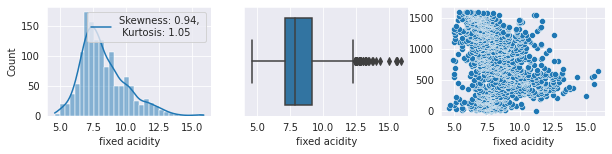

In [ ]:
plot_uni_num(train_df, 1, num_feat_list[0])

**Insight :**

From Histogram plot:
*   The data is moderately postive or right skewed as the skewness is 0.9 (between +0.5 and +1)
*   The data has low kurtosis value of 1.05 (<3)
*   The data has light-tail or lack of outliers.
*   Have outliers and most of them are on the larger side.
*   Therefore, the feature has non-normal distribution

From Box plot:
*   Outliers are visible clearly.
*   Outliers concentration more on right side
*   If the outliers are eliminated then the distribution is almost symmetric.

From Scatter Plot:
*   Most of the values are in 6-11 range
*   Concentration is high around value 8
*   Outlier values beyond 13



**Plot Univariate Analysis for all numeric features**

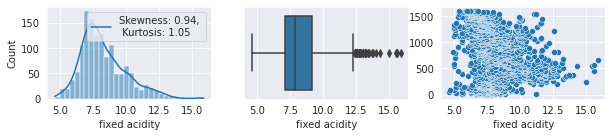

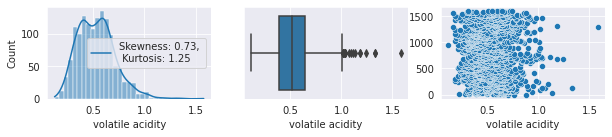

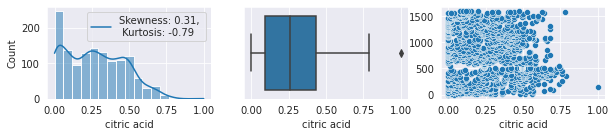

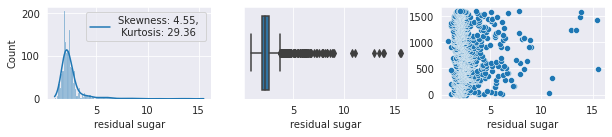

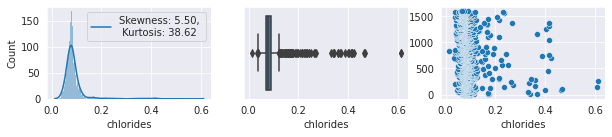

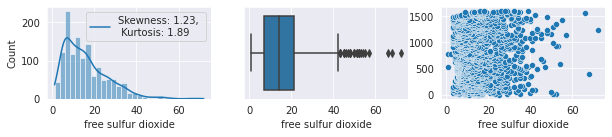

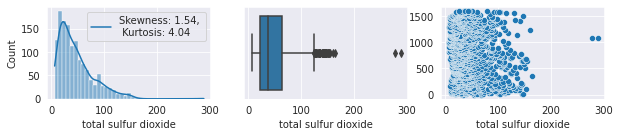

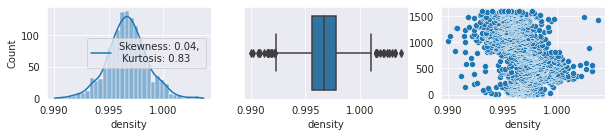

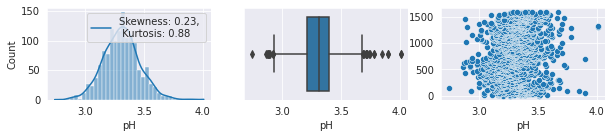

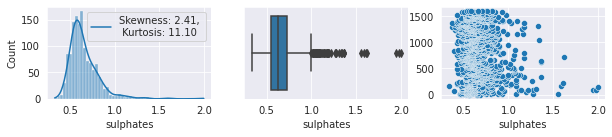

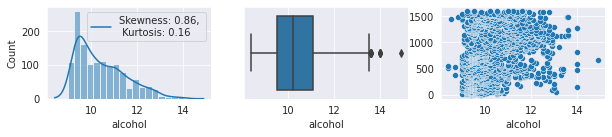

In [ ]:
plot_uni_num_list(train_df, num_feat_list)

**Insight:**

General observations for all feature:
*   Most of the features have outliers
*   Residual sugar, chlorides and sulphates has a positively or right skewed distribution with heavy tail as they have high values of kurtosis
*   Most of the outliers are on larger side
*   Chlorides, density and pH have outliers on both sides
*   Citric acid and alcohol have an irregular distribution but few outliers.


Therefore, before any models are built, the outliers must be handled.


**Plot the distribution of the target variable**

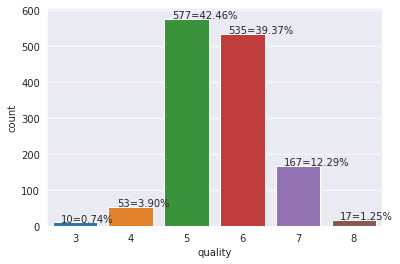

In [ ]:
ax = sns.countplot(x=target_var, data=train_df)
for p in ax.patches:
  ax.annotate('{}={:.2f}%'.format(p.get_height(), p.get_height()/train_df.shape[0]*100), (p.get_x()+0.15, p.get_height()+1))

**Insight :** 
*   Quality has most values concentrated in the categories 5, 6 and 7
*   There are no values in categories 1, 2, 9 and 10
*   Since there is huge disparity in the number of quality inputs, it can be concluded that the dataset is imbalanced.


### **Bivariate Analysis**

**Function to plot box for all features against the target variable**

In [ ]:
#Visualising numeric feature against target variable
def plot_bi_box_num_target(data, feat_list, no_of_cols, target):
  '''
  Input - dataframe, the features list, and no of columns in a row, the target variable
  Output - The box plot
  Process - Box plot in seaborn
  '''
  fig_counter = 1
  no_of_features = len(feat_list)
  fig = plt.figure(figsize=(15, 5*no_of_cols))

  for feature in feat_list:
    plt.subplot(np.ceil(no_of_features/no_of_cols), no_of_cols, fig_counter)
    sns.boxplot(data=data, x=feature, y=target)
    fig_counter = fig_counter + 1
  
  return

**Analyze one feature against the target variable - bivariate analysis using boxplot**

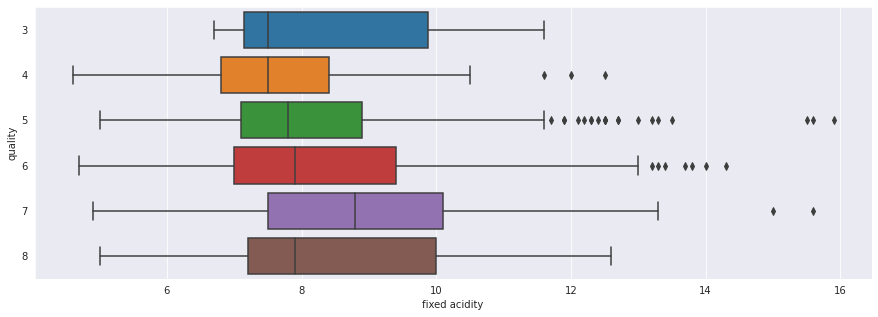

In [ ]:
plot_bi_box_num_target(train_df, ['fixed acidity'], 1, target_var)

**Insight:**
*   The median value for fixed acidity is more in wine of quality 7 than the other wine qualities.
*   The IQR for quality 4 and 5 are reasonably similar (lengths of the boxes is almost same) and the IQR for wine quality 3, 7 and 8 are almost similar.
*   However, the overall range is greater for wines with quality 6 and 7 (as the distances between the ends of the two whiskers is almost similar and longer than others).
*   The wine quality 3 and 8 data appears to be right-skew, and quality 7 is almost normally distributed for feature 'fixed acidity'.
*   Clearly, box plot shows that wine quality 4, 5, 6 and 7 has outliers with respect to feature 'fixed acidity'.
*   Conclusion can be drawn that feature 'fixed acidity' is moderately correlated to the target variable 'quality' (the boxes are not in same line)

**Analyze all features against the target variable - bivariate analysis using boxplot**

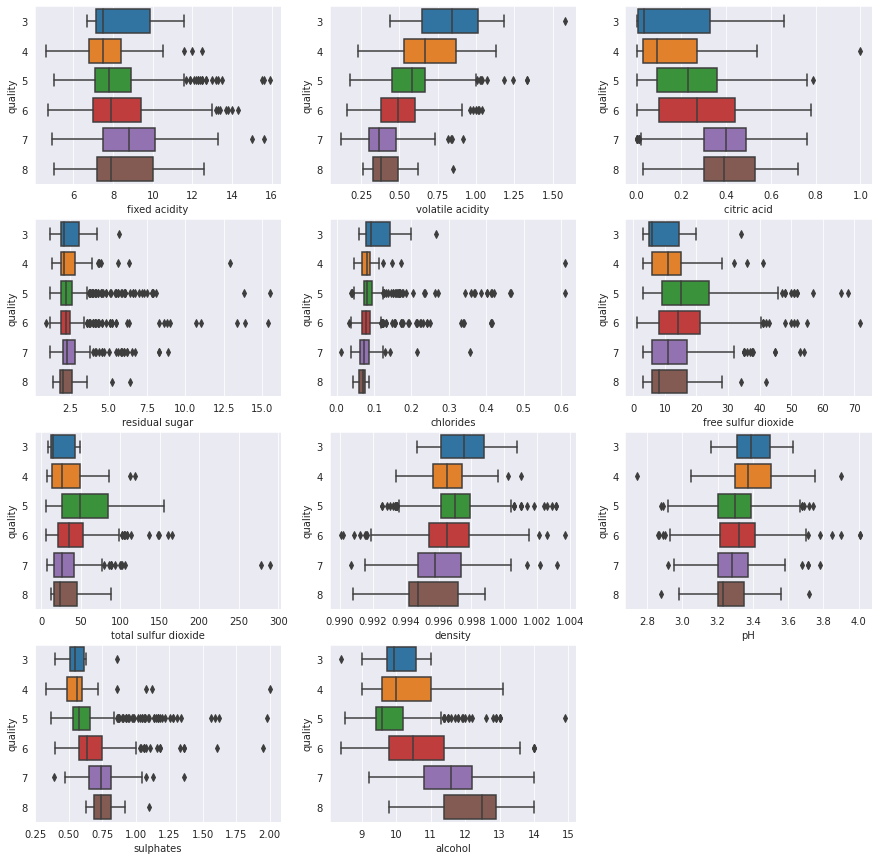

In [ ]:
plot_bi_box_num_target(train_df, num_feat_list, 3, target_var)

**Insight:**
*   Most of the features have outliers and that too for higher end values.
*   Most of the features except 'Residual sugar' are moderately correlated to the target variable 'quality' (the boxes are not in same line)
*   Feature 'Residual sugar' seems not related to target 'quality'



### **Statistical Analysis**

**Statistical Feature analysis (Continuous versus Categorical) using ANOVA test :**

*   Null Hypothesis (H0) : There is no relation between the given feature and the target
*   Alternate Hypothesis (H1) : There is relation between the given feature and the target


In [ ]:
# split into input (X) and output (y) variables
X = train_df.copy()
X.drop(target_var, axis=1, inplace=True)
y = y

#configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
#learn relationship from training data
fs.fit(X, y)

print('##### ANOVA Test Results for Numeric Features ##### \n')
#check the p-values for the features
for i in range(len(fs.pvalues_)):
  p_value = fs.pvalues_[i]
  feature = X.columns[i]
  #If the p-value is <0.05, reject H0
  if (p_value < 0.05):
    print(('Feature %s: is correlated with %s | P-Value: %f' % (feature, target_var, p_value)))
  else:
    print(('Feature %s: is NOT correlated with %s | P-Value: %f' % (feature, target_var, p_value)))

##### ANOVA Test Results for Numeric Features ##### 

Feature fixed acidity: is correlated with quality | P-Value: 0.000102
Feature volatile acidity: is correlated with quality | P-Value: 0.000000
Feature citric acid: is correlated with quality | P-Value: 0.000000
Feature residual sugar: is NOT correlated with quality | P-Value: 0.337335
Feature chlorides: is correlated with quality | P-Value: 0.000063
Feature free sulfur dioxide: is correlated with quality | P-Value: 0.000239
Feature total sulfur dioxide: is correlated with quality | P-Value: 0.000000
Feature density: is correlated with quality | P-Value: 0.000000
Feature pH: is correlated with quality | P-Value: 0.000588
Feature sulphates: is correlated with quality | P-Value: 0.000000
Feature alcohol: is correlated with quality | P-Value: 0.000000


**Insight:**

*   The results of ANOVA confirm that all features except 'Residual sugar' are correlated with the target variable as seen in the visual data analysis above.
*   Based on the above test, 'Residual sugar' can be dropped from the dataset.
*   Rest all other features will be selected for model building



### **Multivariate Analysis:**

**Visualize pairwise plot for all numeric features**

In [ ]:
#g = sns.pairplot(data=train_df, hue=target_var, corner=True, diag_kind="hist", kind='reg')
#g.add_legend()

**Compute Pearson correlation coefficient for numeric features**

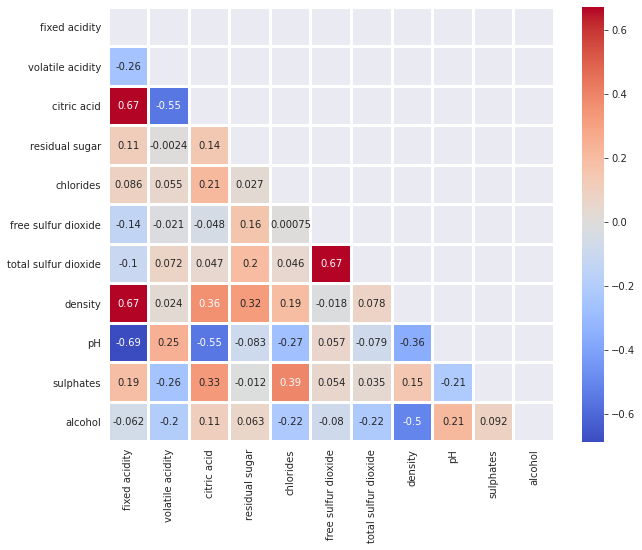

In [ ]:
## The relationship between numeric features
corr = train_df.corr(method='pearson')

# Getting the Upper Triangle of the corelation matrix
matrix = np.triu(corr)

plt.figure(figsize=(10,8))
# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, cmap ='coolwarm', linewidths=2, mask=matrix)

**Insight:**
*   The features 'density' and 'fixed acidity' has strong positive correlation while 'pH' and 'fixed acidity' has strong negative correlation (depicted by darker shades).
*   There is almost no correlation between 'residual sugar' and 'volatile acidity', 'alcohol' and 'sulphates' (depicted by lighter shades).
*   For feature 'residual sugar' correlation is almost zero against other features.






**Find the high correlated features (≥ 40% in absolute value)**


In [ ]:
corr_pairs = corr.unstack()
high_corr = corr_pairs[(abs(corr_pairs) > 0.4) & (corr_pairs !=1)]
high_corr

fixed acidity         citric acid             0.667437
                      density                 0.670195
                      pH                     -0.686685
volatile acidity      citric acid            -0.551248
citric acid           fixed acidity           0.667437
                      volatile acidity       -0.551248
                      pH                     -0.550310
free sulfur dioxide   total sulfur dioxide    0.667246
total sulfur dioxide  free sulfur dioxide     0.667246
density               fixed acidity           0.670195
                      alcohol                -0.504995
pH                    fixed acidity          -0.686685
                      citric acid            -0.550310
alcohol               density                -0.504995
dtype: float64

## **Data Preprocessing**

**Separate Target Output and Input Features**

In [ ]:
train_copy = train_df.copy()

X = train_copy
y = train_copy.quality
X.drop('quality', axis=1, inplace=True)

**Drop the not correlated features with target**

In [ ]:
#Drop the feature which are not correlated to the target variable
X.drop('residual sugar', axis=1, inplace=True)
#remove the feature from the numerical feature list
num_feat_list.remove('residual sugar')

**Flooring and capping for outliers**

In [ ]:
skew_list = []

#Quantile-based Flooring and Capping
for feature in num_feat_list:
  i = num_feat_list.index(feature)
  
  #flooring for the 10th percentile of the lower values
  Q10 = X[feature].quantile(0.10)
  #capping for the 90th percentile of the higher values.
  Q90 = X[feature].quantile(0.90)

  before = X[feature].skew()

  #perform on train data
  X[feature] = np.where(X[feature] < Q10, Q10, X[feature])
  X[feature] = np.where(X[feature] > Q90, Q90, X[feature])

  after = X[feature].skew()

  #print the skewness before and after doing flooring and capping 
  skew_list.append({"Feature":feature, "Before Skewness":before, "After Skewness":after})
  
pd.DataFrame(skew_list)

,Feature,Before Skewness,After Skewness
0,fixed acidity,0.941041,0.504507
1,volatile acidity,0.729279,0.116912
2,citric acid,0.312726,0.037461
3,chlorides,5.502487,0.474331
4,free sulfur dioxide,1.226579,0.528460
5,total sulfur dioxide,1.540368,0.642313
6,density,0.044778,0.070023
7,pH,0.232032,0.064621
8,sulphates,2.406505,0.518854
9,alcohol,0.859841,0.476464


In [ ]:
# detect outliers from all columns, this return the dictionary of indices and column number
outliers = detect_outliers(X, X.columns, 0)

print(tabulate(outliers))

out_val = 0
for ind, val in enumerate(outliers):
  out_val += val.get('No_of_outliers')
print("Total               {}".format(out_val))


Total               0


**Standardization/Normalization of data**

In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
y = np.ravel(y)

**Method oversampling SMOTE**

In [ ]:
print(f"Before OverSampling, {Counter(y)}")
#oversample
X_smote, y_smote = SMOTE(random_state=7).fit_resample(X, y)
print(f"After OverSampling, {Counter(y_smote)}")

Before OverSampling, Counter({5: 577, 6: 535, 7: 167, 4: 53, 8: 17, 3: 10})
After OverSampling, Counter({5: 577, 6: 577, 7: 577, 4: 577, 8: 577, 3: 577})


## **Machine Learning**

**Splitting the data into Training and Testing sample**

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=7)

In [ ]:
# Sanity check for the sampled data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2423, 10), (2423,), (1039, 10), (1039,))

### **Logistic Regression**

In [ ]:
# logistic regression object
classifier = LogisticRegression()
  
# train the model on train set
classifier.fit(X_train, y_train)
  
y_pred = classifier.predict(X_test)

print(f"Тrain: {classifier.score(X_train, y_train)*100} - Тest: {classifier.score(X_test, y_test)*100}")

cv_score = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("for 10-fold Cross Validation cross_val_score: ", cv_score.mean()*100)

print("accuracy_score: ", accuracy_score(y_test, y_pred)*100)

print("balanced_accuracy_score: ", balanced_accuracy_score(y_test, y_pred)*100)

# print classification report
print(classification_report(y_test, y_pred))

Тrain: 57.28435823359471 - Тest: 55.14918190567853
for 10-fold Cross Validation cross_val_score:  56.08849437132265
accuracy_score:  55.14918190567853
balanced_accuracy_score:  55.37492614366196
              precision    recall  f1-score   support

           3       0.69      0.88      0.78       173
           4       0.51      0.48      0.49       163
           5       0.54      0.49      0.51       175
           6       0.41      0.31      0.35       177
           7       0.47      0.42      0.45       182
           8       0.59      0.75      0.66       169

    accuracy                           0.55      1039
   macro avg       0.54      0.55      0.54      1039
weighted avg       0.54      0.55      0.54      1039



### **Extremely Randomized Trees**

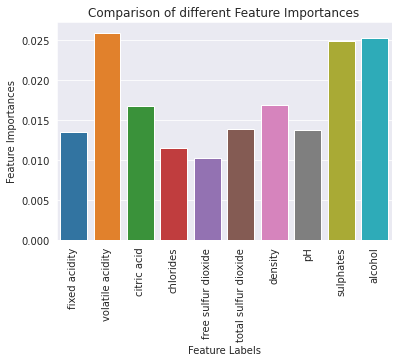

In [ ]:
# Building the model
classifier = ExtraTreesClassifier()

# Training the model
classifier.fit(X_train, y_train)

# Computing the importance of each feature
feature_importance = classifier.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

# Plotting a Bar Graph to compare the models
ax = sns.barplot(X.columns, feature_importance_normalized)
ax.set_xlabel('Feature Labels')
ax.set_ylabel('Feature Importances')
ax.set_title('Comparison of different Feature Importances')
ax.set_xticklabels(labels=X.columns, rotation=90)
print()

**Check the metrics**

In [ ]:
#use the model to predict values
y_pred = classifier.predict(X_test)

print(f"Тrain: {classifier.score(X_train, y_train)*100} - Тest: {classifier.score(X_test, y_test)*100}")

cv_score = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("for 10-fold Cross Validation cross_val_score: ", cv_score.mean()*100)

print("accuracy_score: ", accuracy_score(y_test, y_pred)*100)

print("balanced_accuracy_score: ", balanced_accuracy_score(y_test, y_pred)*100)

print(classification_report(y_test, y_pred))

Тrain: 100.0 - Тest: 84.6968238691049
for 10-fold Cross Validation cross_val_score:  84.72961942658912
accuracy_score:  84.6968238691049
balanced_accuracy_score:  85.01347240330291
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       173
           4       0.91      1.00      0.95       163
           5       0.72      0.67      0.70       175
           6       0.64      0.53      0.58       177
           7       0.82      0.90      0.86       182
           8       0.97      1.00      0.98       169

    accuracy                           0.85      1039
   macro avg       0.84      0.85      0.84      1039
weighted avg       0.84      0.85      0.84      1039



**Model Building Outcomes**

*   LogisticRegression produces around 54% accuracy, while the ensemble model ExtraTreesClassifier gives around 85% which is way better.
*   Select the best average accuracy model, that is ExtraTreesClassifier for predictions.
*   Also the model ExtraTreesClassifier is using the input features better (by looking at its feature importance graph). It is not letting a single input feature or predictor to dominate the decision.

